## Project Discription
** Predict weekly sales at a store level and understand the impact of holidays, temperature, fuel prices,economic conditions (CPI, unemployment) on sales trends. The forecast will assist in better planningof inventory, pricing, and marketing campaigns. **

## Data Summary:
* Duration: 2010-02-05 to 2012-11-01 
* Columns:
  - Store: Store ID
  - Date: Week of sale
  - Weekly_Sales: Sales amount
  - Holiday_Flag: 1 = Holiday Week, 0 = Non-Holiday
  - Temperature: In Fahrenheit
  - Fuel_Price: Regional fuel cost
  - CPI: Consumer Price Index
  - Unemployment: Unemployment rate

** Step-1 : Importing Required Libraries **


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

** Step-2 : Load Data **

In [24]:
data = pd.read_csv("walmart-dataset-retail\Walmart_Store_sales.csv")
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
print(data.head())

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


** Step3: Feature Endineering **

In [25]:
## Create additional time-based features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week.astype(int)
data['Is_Holiday'] = data['Holiday_Flag']

In [26]:
## Drop original Holiday_Flag to avoid redundancy
data.drop('Holiday_Flag', axis=1, inplace=True)


** Step 4: Exploratory Data Analysis (EDA) **


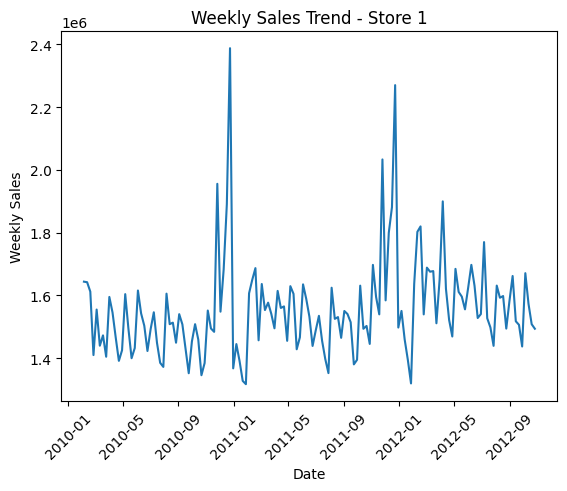

In [28]:
sns.lineplot(data=data[data['Store'] == 1], x='Date', y='Weekly_Sales')
plt.title('Weekly Sales Trend - Store 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.show()

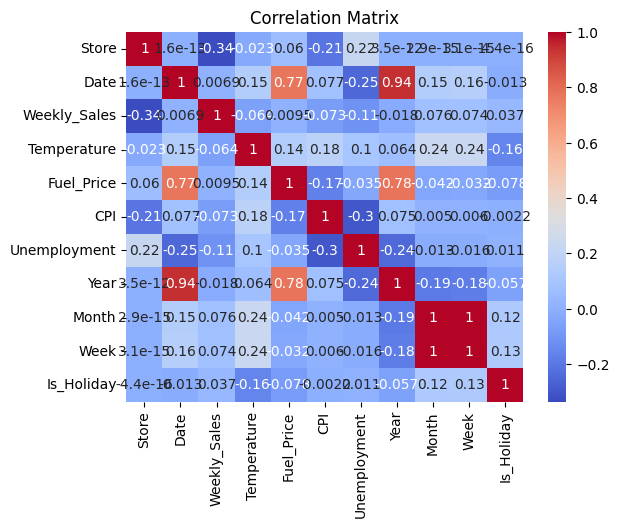

In [30]:
## Correlation Matrix
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

** Step 5: Prepare Data for Modeling **


In [31]:
features = ['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Is_Holiday', 'Month', 'Week', 'Year']
target = 'Weekly_Sales'

X = data[features]
y = data[target]

# Optional: Scale continuous features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

** Step 6: Train-Test Split **


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


** Step 7: Train Model (Random Forest) **


In [33]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


** Step 8: Evaluate Model **


In [34]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")

RMSE: 116886.99, MAE: 62519.31


** Step 9: Feature Importance **


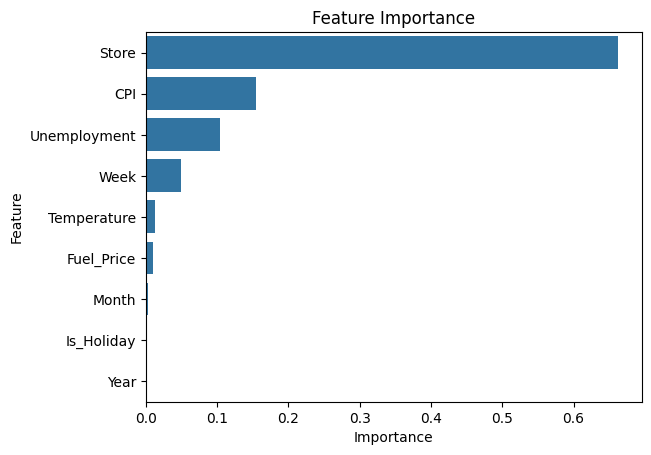

In [35]:
importance = model.feature_importances_
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)
sns.barplot(data=feat_imp, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

** Step 10: Save Predictions **


In [36]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
results.to_csv('walmart_sales_predictions.csv', index=False)
